In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install flair==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 63.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 100.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82

In [3]:
!pip install transformers==4.30.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [4]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings, FastTextEmbeddings
from typing import List

In [5]:
# French corpus of 32 texts from ECHR (automatic and official translations with manual annotations)

columns = {0:'text', 1:'ner'}

corpus_folder = '/content/drive/MyDrive/.../'
corpus : Corpus = ColumnCorpus(corpus_folder, columns,
                                    train_file='FR-manual-train.tsv', column_delimiter=' ',
                                    dev_file='FR-manual-dev.tsv',
                                    test_file='FR-manual-test.tsv'
)

# obtain and print corpus statistics
stats = corpus.obtain_statistics()
print(stats)

2024-01-23 17:03:40,281 Reading data from /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler
2024-01-23 17:03:40,282 Train: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/FR-manual-train.tsv
2024-01-23 17:03:40,284 Dev: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/FR-manual-dev.tsv
2024-01-23 17:03:40,286 Test: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/FR-manual-test.tsv
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 1335,
        "number_of_documents_per_class": {
            "DATE": 537,
            "LOC": 275,
            "CODE": 71,
            "PER": 179,
            "NATIONALITY": 75,
            "LEGAL_PROFESSIONAL": 214,
            "QUANTITY": 157,
            "ORG": 132,
            "ETHNIC_CATEGORY": 14,
            "TIME": 13,
            "CURRENCY": 16,
            "DATETIME": 2
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 3

In [6]:
# initialize sequence tagger
from flair.models import SequenceTagger

tagger = SequenceTagger.load("flair/ner-french")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.30G [00:00<?, ?B/s]

2024-01-23 17:03:52,953 SequenceTagger predicts: Dictionary with 19 tags: O, S-LOC, B-LOC, E-LOC, I-LOC, S-PER, B-PER, E-PER, I-PER, S-MISC, B-MISC, E-MISC, I-MISC, S-ORG, B-ORG, E-ORG, I-ORG, <START>, <STOP>


In [7]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
new_tag_dictionary = corpus.make_label_dictionary(label_type=tag_type)
print(new_tag_dictionary.idx2item)

2024-01-23 17:03:53,209 Computing label dictionary. Progress:


1335it [00:00, 43666.48it/s]

2024-01-23 17:03:53,246 Dictionary created for label 'ner' with 13 values: DATE (seen 537 times), LOC (seen 275 times), LEGAL_PROFESSIONAL (seen 214 times), PER (seen 179 times), QUANTITY (seen 157 times), ORG (seen 132 times), NATIONALITY (seen 75 times), CODE (seen 71 times), CURRENCY (seen 16 times), ETHNIC_CATEGORY (seen 14 times), TIME (seen 13 times), DATETIME (seen 2 times)
[b'<unk>', b'DATE', b'LOC', b'LEGAL_PROFESSIONAL', b'PER', b'QUANTITY', b'ORG', b'NATIONALITY', b'CODE', b'CURRENCY', b'ETHNIC_CATEGORY', b'TIME', b'DATETIME']


In [8]:
print(tagger.label_dictionary.idx2item)

[b'O', b'S-LOC', b'B-LOC', b'E-LOC', b'I-LOC', b'S-PER', b'B-PER', b'E-PER', b'I-PER', b'S-MISC', b'B-MISC', b'E-MISC', b'I-MISC', b'S-ORG', b'B-ORG', b'E-ORG', b'I-ORG', b'<START>', b'<STOP>']


In [9]:
new_tagger = SequenceTagger(tagger.embeddings, new_tag_dictionary, tag_type=tag_type)

2024-01-23 17:03:53,263 SequenceTagger predicts: Dictionary with 49 tags: O, S-DATE, B-DATE, E-DATE, I-DATE, S-LOC, B-LOC, E-LOC, I-LOC, S-LEGAL_PROFESSIONAL, B-LEGAL_PROFESSIONAL, E-LEGAL_PROFESSIONAL, I-LEGAL_PROFESSIONAL, S-PER, B-PER, E-PER, I-PER, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-ORG, B-ORG, E-ORG, I-ORG, S-NATIONALITY, B-NATIONALITY, E-NATIONALITY, I-NATIONALITY, S-CODE, B-CODE, E-CODE, I-CODE, S-CURRENCY, B-CURRENCY, E-CURRENCY, I-CURRENCY, S-ETHNIC_CATEGORY, B-ETHNIC_CATEGORY, E-ETHNIC_CATEGORY, I-ETHNIC_CATEGORY, S-TIME, B-TIME, E-TIME, I-TIME, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME


In [10]:
# initialize trainer
from flair.trainers import ModelTrainer
trainer = ModelTrainer(new_tagger, corpus)

In [11]:
# train # train_with_dev=True
trainer.train('/content/drive/MyDrive/...',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=10,
              write_weights=True)
# saving the model into your drive (need to provide the full path of the folder in which you want to save the model)

2024-01-23 17:03:53,686 ----------------------------------------------------------------------------------------------------
2024-01-23 17:03:53,688 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      '0-/vol/home-vol2/ml/akbikala/.flair/embeddings/fr-wiki-fasttext-300d-1M'
      (embedding): Embedding(1000000, 300)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(275, 100)
        (rnn): LSTM(100, 1024)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(275, 100)
        (rnn): LSTM(100, 1024)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=2348, out_features=2348, bias=True)
  (rnn): LSTM(2348, 256, batch_first=True, bidirectional=True)
  (linea

100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

2024-01-23 17:04:15,069 Evaluating as a multi-label problem: False
2024-01-23 17:04:15,089 DEV : loss 0.4951706528663635 - f1-score (micro avg)  0.2214
2024-01-23 17:04:15,105 BAD EPOCHS (no improvement): 0
2024-01-23 17:04:15,111 saving best model


2024-01-23 17:04:19,087 ----------------------------------------------------------------------------------------------------
2024-01-23 17:04:19,678 epoch 2 - iter 4/42 - loss 0.52981940 - time (sec): 0.59 - samples/sec: 5908.18 - lr: 0.100000
2024-01-23 17:04:23,499 epoch 2 - iter 8/42 - loss 0.57172017 - time (sec): 4.41 - samples/sec: 1727.47 - lr: 0.100000
2024-01-23 17:04:24,953 epoch 2 - iter 12/42 - loss 0.49763661 - time (sec): 5.86 - samples/sec: 1967.00 - lr: 0.100000
2024-01-23 17:04:26,384 epoch 2 - iter 16/42 - loss 0.47218197 - time (sec): 7.29 - samples/sec: 2084.88 - lr: 0.100000
2024-01-23 17:04:28,003 epoch 2 - iter 20/42 - loss 0.44840688 - time (sec): 8.91 - samples/sec: 2118.09 - lr: 0.100000
2024-01-23 17:04:29,474 epoch 2 - iter 24/42 - loss 0.43299742 - time (sec): 10.39 - samples/sec: 2135.74 - lr: 0.100000
2024-01-23 17:04:31,073 epoch 2 - iter 28/42 - loss 0.41452950 - time (sec): 11.98 - samples/sec: 2177.20 - lr: 0.100000
2024-01-23 17:04:32,582 epoch 2 - i

100%|██████████| 4/4 [00:01<00:00,  3.81it/s]

2024-01-23 17:04:38,122 Evaluating as a multi-label problem: False
2024-01-23 17:04:38,143 DEV : loss 0.2917502224445343 - f1-score (micro avg)  0.4031
2024-01-23 17:04:38,163 BAD EPOCHS (no improvement): 0
2024-01-23 17:04:38,169 saving best model


2024-01-23 17:04:42,994 ----------------------------------------------------------------------------------------------------
2024-01-23 17:04:43,699 epoch 3 - iter 4/42 - loss 0.28805106 - time (sec): 0.70 - samples/sec: 5338.45 - lr: 0.100000
2024-01-23 17:04:47,225 epoch 3 - iter 8/42 - loss 0.25898465 - time (sec): 4.23 - samples/sec: 1763.33 - lr: 0.100000
2024-01-23 17:04:48,712 epoch 3 - iter 12/42 - loss 0.28912722 - time (sec): 5.72 - samples/sec: 1961.54 - lr: 0.100000
2024-01-23 17:04:50,044 epoch 3 - iter 16/42 - loss 0.28324684 - time (sec): 7.05 - samples/sec: 2090.40 - lr: 0.100000
2024-01-23 17:04:52,223 epoch 3 - iter 20/42 - loss 0.30104736 - time (sec): 9.23 - samples/sec: 2048.38 - lr: 0.100000
2024-01-23 17:04:53,667 epoch 3 - iter 24/42 - loss 0.29365600 - time (sec): 10.67 - samples/sec: 2083.56 - lr: 0.100000
2024-01-23 17:04:55,206 epoch 3 - iter 28/42 - loss 0.28580262 - time (sec): 12.21 - samples/sec: 2129.60 - lr: 0.100000
2024-01-23 17:04:56,768 epoch 3 - i

100%|██████████| 4/4 [00:01<00:00,  3.63it/s]

2024-01-23 17:05:02,295 Evaluating as a multi-label problem: False
2024-01-23 17:05:02,309 DEV : loss 0.19563941657543182 - f1-score (micro avg)  0.5824
2024-01-23 17:05:02,324 BAD EPOCHS (no improvement): 0
2024-01-23 17:05:02,329 saving best model


2024-01-23 17:05:06,463 ----------------------------------------------------------------------------------------------------
2024-01-23 17:05:07,684 epoch 4 - iter 4/42 - loss 0.19711098 - time (sec): 1.22 - samples/sec: 3292.09 - lr: 0.100000
2024-01-23 17:05:10,492 epoch 4 - iter 8/42 - loss 0.20774598 - time (sec): 4.03 - samples/sec: 1822.98 - lr: 0.100000
2024-01-23 17:05:11,850 epoch 4 - iter 12/42 - loss 0.19425078 - time (sec): 5.38 - samples/sec: 1980.66 - lr: 0.100000
2024-01-23 17:05:14,182 epoch 4 - iter 16/42 - loss 0.21958709 - time (sec): 7.72 - samples/sec: 1890.44 - lr: 0.100000
2024-01-23 17:05:15,812 epoch 4 - iter 20/42 - loss 0.21922801 - time (sec): 9.35 - samples/sec: 1953.66 - lr: 0.100000
2024-01-23 17:05:17,345 epoch 4 - iter 24/42 - loss 0.21932298 - time (sec): 10.88 - samples/sec: 2045.42 - lr: 0.100000
2024-01-23 17:05:18,922 epoch 4 - iter 28/42 - loss 0.21730657 - time (sec): 12.46 - samples/sec: 2079.14 - lr: 0.100000
2024-01-23 17:05:20,447 epoch 4 - i

100%|██████████| 4/4 [00:01<00:00,  3.79it/s]

2024-01-23 17:05:25,569 Evaluating as a multi-label problem: False
2024-01-23 17:05:25,584 DEV : loss 0.13888941705226898 - f1-score (micro avg)  0.6141
2024-01-23 17:05:25,602 BAD EPOCHS (no improvement): 0
2024-01-23 17:05:25,608 saving best model


2024-01-23 17:05:29,727 ----------------------------------------------------------------------------------------------------
2024-01-23 17:05:30,497 epoch 5 - iter 4/42 - loss 0.17928692 - time (sec): 0.77 - samples/sec: 5012.75 - lr: 0.100000
2024-01-23 17:05:33,483 epoch 5 - iter 8/42 - loss 0.16296600 - time (sec): 3.75 - samples/sec: 1871.91 - lr: 0.100000
2024-01-23 17:05:34,863 epoch 5 - iter 12/42 - loss 0.16944174 - time (sec): 5.13 - samples/sec: 2042.29 - lr: 0.100000
2024-01-23 17:05:36,197 epoch 5 - iter 16/42 - loss 0.18993971 - time (sec): 6.47 - samples/sec: 2137.55 - lr: 0.100000
2024-01-23 17:05:37,650 epoch 5 - iter 20/42 - loss 0.18384651 - time (sec): 7.92 - samples/sec: 2226.78 - lr: 0.100000
2024-01-23 17:05:39,217 epoch 5 - iter 24/42 - loss 0.17187213 - time (sec): 9.49 - samples/sec: 2225.35 - lr: 0.100000
2024-01-23 17:05:41,506 epoch 5 - iter 28/42 - loss 0.18412525 - time (sec): 11.78 - samples/sec: 2124.85 - lr: 0.100000
2024-01-23 17:05:43,038 epoch 5 - it

100%|██████████| 4/4 [00:01<00:00,  3.71it/s]

2024-01-23 17:05:48,396 Evaluating as a multi-label problem: False
2024-01-23 17:05:48,412 DEV : loss 0.14076870679855347 - f1-score (micro avg)  0.6977
2024-01-23 17:05:48,426 BAD EPOCHS (no improvement): 0
2024-01-23 17:05:48,431 saving best model


2024-01-23 17:05:52,583 ----------------------------------------------------------------------------------------------------
2024-01-23 17:05:53,272 epoch 6 - iter 4/42 - loss 0.11896610 - time (sec): 0.69 - samples/sec: 4998.65 - lr: 0.100000
2024-01-23 17:05:56,675 epoch 6 - iter 8/42 - loss 0.14306241 - time (sec): 4.09 - samples/sec: 1822.51 - lr: 0.100000
2024-01-23 17:05:58,095 epoch 6 - iter 12/42 - loss 0.14869583 - time (sec): 5.51 - samples/sec: 1942.94 - lr: 0.100000
2024-01-23 17:05:59,557 epoch 6 - iter 16/42 - loss 0.16666625 - time (sec): 6.97 - samples/sec: 2080.31 - lr: 0.100000
2024-01-23 17:06:01,760 epoch 6 - iter 20/42 - loss 0.17949286 - time (sec): 9.17 - samples/sec: 1990.10 - lr: 0.100000
2024-01-23 17:06:03,339 epoch 6 - iter 24/42 - loss 0.17297803 - time (sec): 10.75 - samples/sec: 2059.43 - lr: 0.100000
2024-01-23 17:06:05,013 epoch 6 - iter 28/42 - loss 0.16788872 - time (sec): 12.43 - samples/sec: 2082.70 - lr: 0.100000
2024-01-23 17:06:06,559 epoch 6 - i

100%|██████████| 4/4 [00:01<00:00,  3.90it/s]

2024-01-23 17:06:11,582 Evaluating as a multi-label problem: False
2024-01-23 17:06:11,599 DEV : loss 0.10770360380411148 - f1-score (micro avg)  0.736
2024-01-23 17:06:11,615 BAD EPOCHS (no improvement): 0
2024-01-23 17:06:11,621 saving best model


2024-01-23 17:06:15,662 ----------------------------------------------------------------------------------------------------
2024-01-23 17:06:16,385 epoch 7 - iter 4/42 - loss 0.13011133 - time (sec): 0.72 - samples/sec: 5316.88 - lr: 0.100000
2024-01-23 17:06:19,881 epoch 7 - iter 8/42 - loss 0.11520027 - time (sec): 4.22 - samples/sec: 1901.77 - lr: 0.100000
2024-01-23 17:06:21,358 epoch 7 - iter 12/42 - loss 0.13339158 - time (sec): 5.69 - samples/sec: 2025.13 - lr: 0.100000
2024-01-23 17:06:22,734 epoch 7 - iter 16/42 - loss 0.12735904 - time (sec): 7.07 - samples/sec: 2105.71 - lr: 0.100000
2024-01-23 17:06:24,201 epoch 7 - iter 20/42 - loss 0.13039517 - time (sec): 8.54 - samples/sec: 2178.94 - lr: 0.100000
2024-01-23 17:06:25,784 epoch 7 - iter 24/42 - loss 0.12786121 - time (sec): 10.12 - samples/sec: 2228.30 - lr: 0.100000
2024-01-23 17:06:27,289 epoch 7 - iter 28/42 - loss 0.12475539 - time (sec): 11.62 - samples/sec: 2234.05 - lr: 0.100000
2024-01-23 17:06:28,800 epoch 7 - i

100%|██████████| 4/4 [00:01<00:00,  3.91it/s]

2024-01-23 17:06:34,813 Evaluating as a multi-label problem: False
2024-01-23 17:06:34,829 DEV : loss 0.10380075126886368 - f1-score (micro avg)  0.7233
2024-01-23 17:06:34,844 BAD EPOCHS (no improvement): 1
2024-01-23 17:06:34,849 ----------------------------------------------------------------------------------------------------


2024-01-23 17:06:35,559 epoch 8 - iter 4/42 - loss 0.09507464 - time (sec): 0.71 - samples/sec: 5239.29 - lr: 0.100000
2024-01-23 17:06:37,068 epoch 8 - iter 8/42 - loss 0.10375801 - time (sec): 2.22 - samples/sec: 3266.40 - lr: 0.100000
2024-01-23 17:06:38,665 epoch 8 - iter 12/42 - loss 0.09799519 - time (sec): 3.81 - samples/sec: 2781.90 - lr: 0.100000
2024-01-23 17:06:40,205 epoch 8 - iter 16/42 - loss 0.09745149 - time (sec): 5.35 - samples/sec: 2611.82 - lr: 0.100000
2024-01-23 17:06:41,839 epoch 8 - iter 20/42 - loss 0.09927573 - time (sec): 6.99 - samples/sec: 2525.36 - lr: 0.100000
2024-01-23 17:06:44,193 epoch 8 - iter 24/42 - loss 0.10877680 - time (sec): 9.34 - samples/sec: 2348.40 - lr: 0.100000
2024-01-23 17:06:45,642 epoch 8 - iter 28/42 - loss 0.11010961 - time (sec): 10.79 - samples/sec: 2364.85 - lr: 0.100000
2024-01-23 17:06:47,179 epoch 8 - iter 32/42 - loss 0.11221367 - time (sec): 12.33 - samples/sec: 2399.09 - lr: 0.100000
2024-01-23 17:06:48,529 epoch 8 - iter 3

100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

2024-01-23 17:06:52,479 Evaluating as a multi-label problem: False
2024-01-23 17:06:52,493 DEV : loss 0.10615719854831696 - f1-score (micro avg)  0.7116
2024-01-23 17:06:52,508 BAD EPOCHS (no improvement): 2
2024-01-23 17:06:52,512 ----------------------------------------------------------------------------------------------------


2024-01-23 17:06:53,191 epoch 9 - iter 4/42 - loss 0.09485289 - time (sec): 0.68 - samples/sec: 5378.83 - lr: 0.100000
2024-01-23 17:06:54,505 epoch 9 - iter 8/42 - loss 0.09095419 - time (sec): 1.99 - samples/sec: 3546.18 - lr: 0.100000
2024-01-23 17:06:55,947 epoch 9 - iter 12/42 - loss 0.09554051 - time (sec): 3.43 - samples/sec: 3208.14 - lr: 0.100000
2024-01-23 17:06:58,175 epoch 9 - iter 16/42 - loss 0.12691150 - time (sec): 5.66 - samples/sec: 2714.44 - lr: 0.100000
2024-01-23 17:06:59,604 epoch 9 - iter 20/42 - loss 0.12047617 - time (sec): 7.09 - samples/sec: 2632.92 - lr: 0.100000
2024-01-23 17:07:01,103 epoch 9 - iter 24/42 - loss 0.11775322 - time (sec): 8.59 - samples/sec: 2624.34 - lr: 0.100000
2024-01-23 17:07:02,563 epoch 9 - iter 28/42 - loss 0.11319693 - time (sec): 10.05 - samples/sec: 2610.48 - lr: 0.100000
2024-01-23 17:07:03,960 epoch 9 - iter 32/42 - loss 0.11003171 - time (sec): 11.45 - samples/sec: 2611.68 - lr: 0.100000
2024-01-23 17:07:05,318 epoch 9 - iter 3

100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

2024-01-23 17:07:08,785 Evaluating as a multi-label problem: False
2024-01-23 17:07:08,798 DEV : loss 0.07202094048261642 - f1-score (micro avg)  0.7955
2024-01-23 17:07:08,812 BAD EPOCHS (no improvement): 0
2024-01-23 17:07:08,828 saving best model


2024-01-23 17:07:13,020 ----------------------------------------------------------------------------------------------------
2024-01-23 17:07:13,689 epoch 10 - iter 4/42 - loss 0.10416805 - time (sec): 0.67 - samples/sec: 5292.71 - lr: 0.100000
2024-01-23 17:07:17,100 epoch 10 - iter 8/42 - loss 0.09688143 - time (sec): 4.08 - samples/sec: 1832.66 - lr: 0.100000
2024-01-23 17:07:18,499 epoch 10 - iter 12/42 - loss 0.08351859 - time (sec): 5.48 - samples/sec: 2009.35 - lr: 0.100000
2024-01-23 17:07:19,890 epoch 10 - iter 16/42 - loss 0.09561142 - time (sec): 6.87 - samples/sec: 2076.91 - lr: 0.100000
2024-01-23 17:07:21,522 epoch 10 - iter 20/42 - loss 0.09502447 - time (sec): 8.50 - samples/sec: 2147.76 - lr: 0.100000
2024-01-23 17:07:23,063 epoch 10 - iter 24/42 - loss 0.09522581 - time (sec): 10.04 - samples/sec: 2151.34 - lr: 0.100000
2024-01-23 17:07:24,581 epoch 10 - iter 28/42 - loss 0.09698603 - time (sec): 11.56 - samples/sec: 2181.95 - lr: 0.100000
2024-01-23 17:07:26,120 epoc

100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

2024-01-23 17:07:32,150 Evaluating as a multi-label problem: False
2024-01-23 17:07:32,165 DEV : loss 0.07959703356027603 - f1-score (micro avg)  0.7577
2024-01-23 17:07:32,180 BAD EPOCHS (no improvement): 1


2024-01-23 17:07:36,182 ----------------------------------------------------------------------------------------------------
2024-01-23 17:07:40,576 SequenceTagger predicts: Dictionary with 51 tags: O, S-DATE, B-DATE, E-DATE, I-DATE, S-LOC, B-LOC, E-LOC, I-LOC, S-LEGAL_PROFESSIONAL, B-LEGAL_PROFESSIONAL, E-LEGAL_PROFESSIONAL, I-LEGAL_PROFESSIONAL, S-PER, B-PER, E-PER, I-PER, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-ORG, B-ORG, E-ORG, I-ORG, S-NATIONALITY, B-NATIONALITY, E-NATIONALITY, I-NATIONALITY, S-CODE, B-CODE, E-CODE, I-CODE, S-CURRENCY, B-CURRENCY, E-CURRENCY, I-CURRENCY, S-ETHNIC_CATEGORY, B-ETHNIC_CATEGORY, E-ETHNIC_CATEGORY, I-ETHNIC_CATEGORY, S-TIME, B-TIME, E-TIME, I-TIME, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME, <START>


100%|██████████| 6/6 [00:01<00:00,  5.53it/s]

2024-01-23 17:07:42,078 Evaluating as a multi-label problem: False
2024-01-23 17:07:42,093 0.8716	0.8261	0.8482	0.76
2024-01-23 17:07:42,094 
Results:
- F-score (micro) 0.8482
- F-score (macro) 0.6711
- Accuracy 0.76

By class:
                    precision    recall  f1-score   support

LEGAL_PROFESSIONAL     0.8800    0.9429    0.9103        70
              DATE     0.9615    0.9091    0.9346        55
               LOC     0.9333    0.8485    0.8889        33
               PER     0.7778    0.6000    0.6774        35
          QUANTITY     0.7059    0.8000    0.7500        15
       NATIONALITY     0.8889    0.8889    0.8889         9
              CODE     0.7500    0.4286    0.5455         7
               ORG     0.5000    0.4000    0.4444         5
          CURRENCY     0.0000    0.0000    0.0000         1

         micro avg     0.8716    0.8261    0.8482       230
         macro avg     0.7108    0.6464    0.6711       230
      weighted avg     0.8645    0.8261    0.8411 

{'test_score': 0.8482142857142858,
 'dev_score_history': [0.22137404580152667,
  0.40310077519379844,
  0.5823529411764706,
  0.6140845070422536,
  0.6976744186046512,
  0.7359550561797752,
  0.7232876712328766,
  0.711590296495957,
  0.7955182072829131,
  0.7576601671309192],
 'train_loss_history': [0.8020096113412025,
  0.3942308240301696,
  0.2740140924408267,
  0.21070691390882682,
  0.1717530918839395,
  0.15034952251403616,
  0.13246214296938097,
  0.11783745611664018,
  0.10707118721585727,
  0.10070727315803872],
 'dev_loss_history': [0.4951706528663635,
  0.2917502224445343,
  0.19563941657543182,
  0.13888941705226898,
  0.14076870679855347,
  0.10770360380411148,
  0.10380075126886368,
  0.10615719854831696,
  0.07202094048261642,
  0.07959703356027603]}

2024-01-23 17:07:42,113 ----------------------------------------------------------------------------------------------------
2024-01-23 17:07:42,114 WARNING: No LOSS found for test split in this data.
2024-01-23 17:07:42,115 Are you sure you want to plot LOSS and not another value?
2024-01-23 17:07:42,116 ----------------------------------------------------------------------------------------------------
2024-01-23 17:07:42,143 ----------------------------------------------------------------------------------------------------
2024-01-23 17:07:42,143 WARNING: No F1 found for test split in this data.
2024-01-23 17:07:42,144 Are you sure you want to plot F1 and not another value?
2024-01-23 17:07:42,145 ----------------------------------------------------------------------------------------------------
2024-01-23 17:07:43,238 Loss and F1 plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-FR/Flair-manual-FR/Flair-manual-model-FR-all/training.png


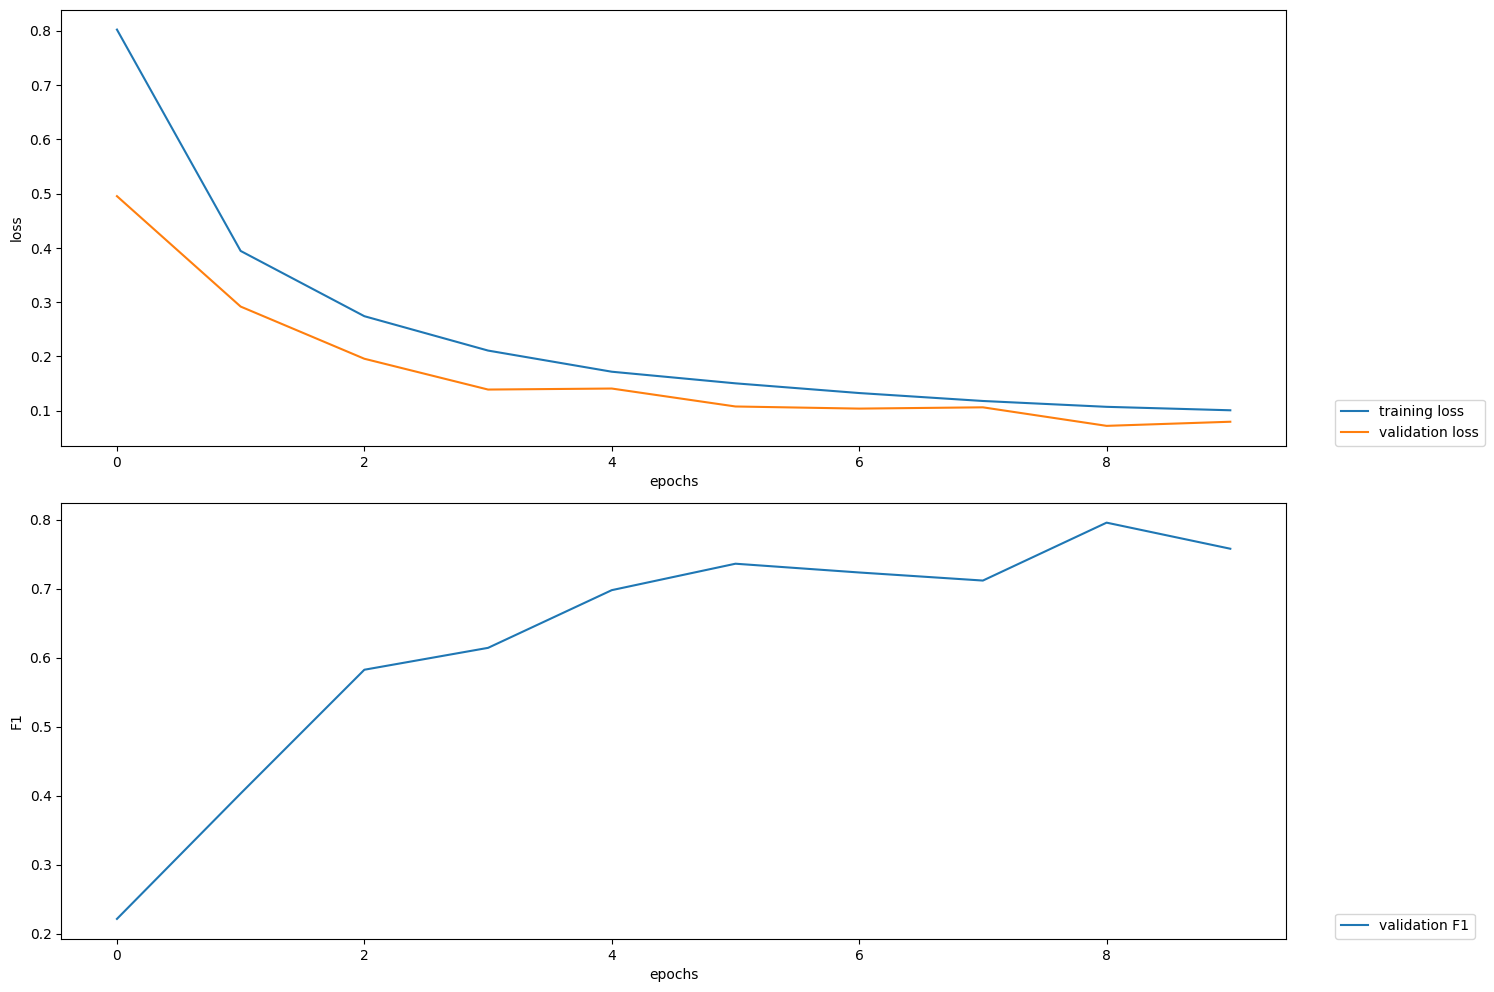

2024-01-23 17:07:46,669 Weights plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-FR/Flair-manual-FR/Flair-manual-model-FR-all/weights.png


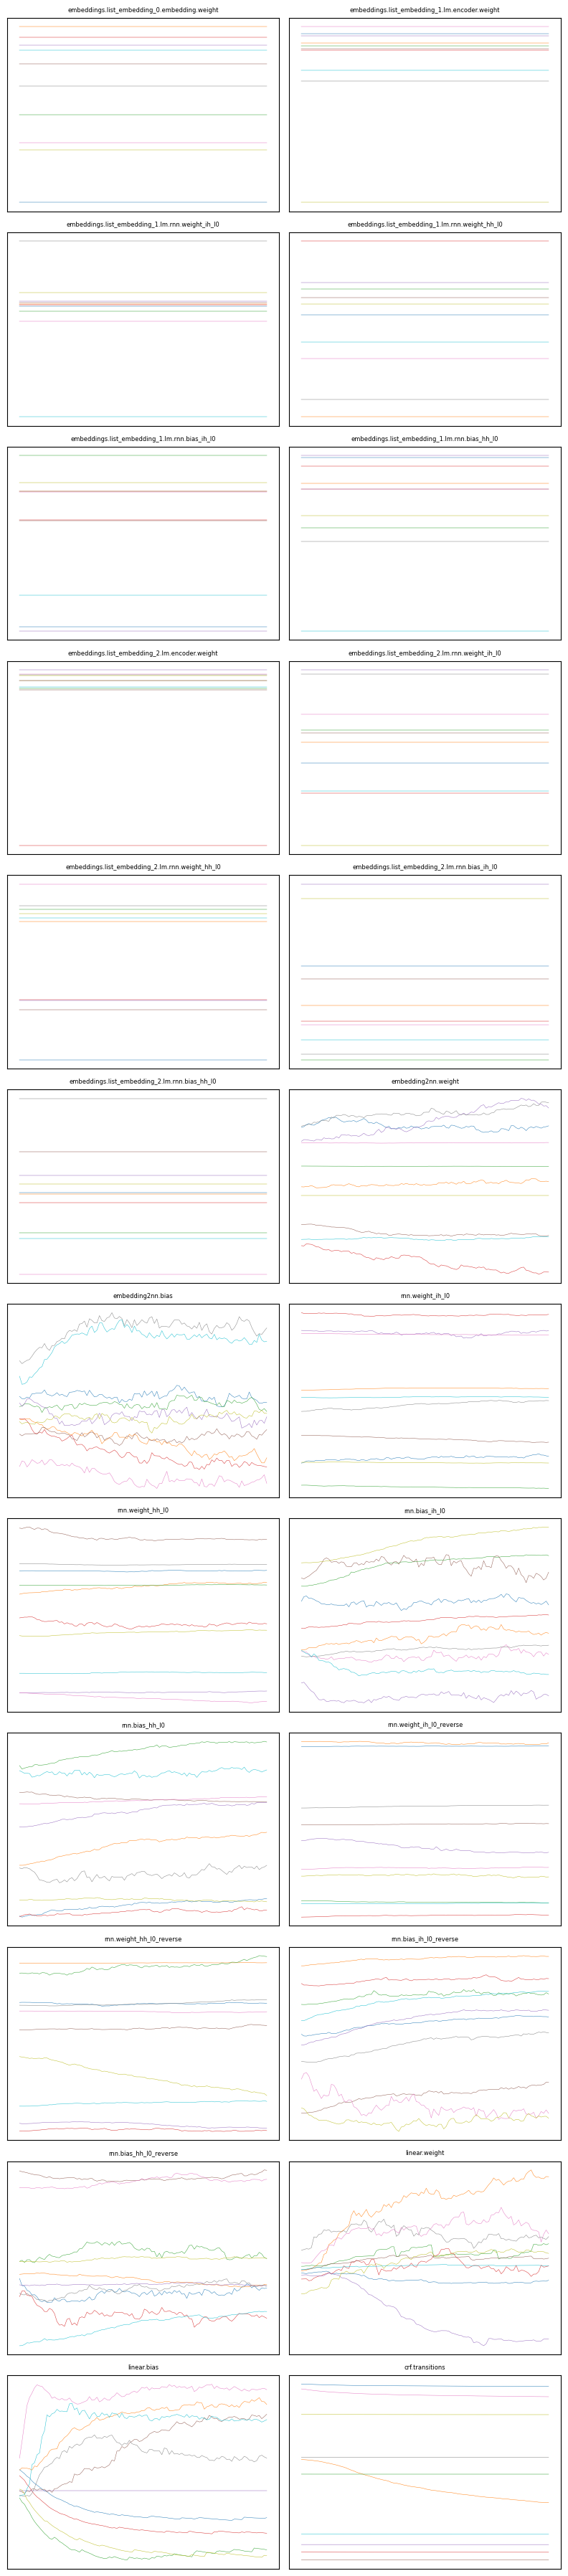

In [12]:
# plot training loss and weights
# Check documentation on training models with Flair

from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/.../loss.tsv')
plotter.plot_weights('/content/drive/MyDrive/.../weights.txt')